# Tema 4: Detectar color

Otra clasificación que se incluyó en el contador automático fue la detección de taxis basada en el color de los vehículos.

In [3]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

Se importa una imagen que es una captura de los videos usados en este proyecto.

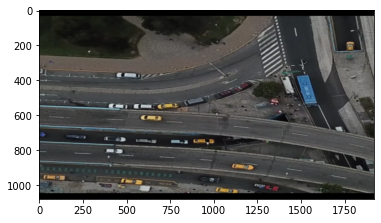

In [13]:
img = cv2.imread('imagenes/detectar-taxis.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

La detección de color necesita una imagen que utilice los canales HSV y no RGB.

In [14]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

El contador no usa todo el frame para la detección, se extrae una zona de interés para obtener una imagen más específica.

In [15]:
xr1 = 0
xr2 = 1200
yr1 = 300
yr2 = 1000
#zona de interés
roi = hsv[yr1:yr2,xr1:xr2]

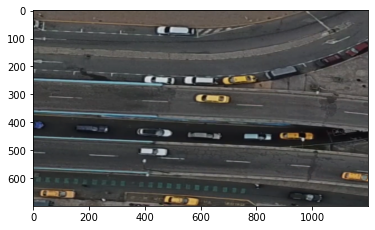

In [12]:
show_roi = cv2.cvtColor(roi, cv2.COLOR_HSV2RGB)
plt.imshow(show_roi)

Se utiliza la función `inRange` de OpenCV para detectar los objetos dentro de la imagen que tienen un color similar al amarillo.

In [16]:
#hay que encontrar los valores para detectar amarillo
lower = np.array([20, 60, 60])  
upper = np.array([40, 255, 255])
center_color = cv2.inRange(roi,lower,upper)

La función retorna una máscara en la que sólo aparecen los objetos que coinciden con el rango de color elegido.

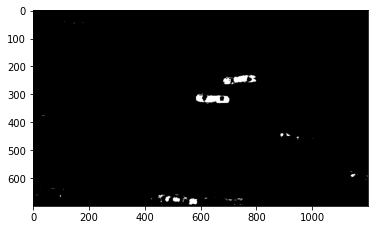

In [65]:
plt.imshow(center_color,'gray')

Este proceso se encuentra implementado en la función [detect_taxis](../funciones/detect_taxis.py) 